#### 导入数据\


In [160]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from patsy import dmatrix 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import linear_model 
%matplotlib inline 

ipos = pd.read_csv(r'D:/GoCode/ML/ipos/main.ipynb/ipo_data.csv',encoding='latin-1') 
ipos = ipos.iloc[:, 1:]
ipos 

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
0,2020-01-17 00:00:00,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.089286,0.7500,-1.2500,2,NaN
1,2020-01-17 00:00:00,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.057273,0.0300,0.6300,1,NaN
2,2020-01-17 00:00:00,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0.000000,0.0000,0.0000,1,NaN
3,2020-01-17 00:00:00,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.039231,0.8500,0.5100,1,NaN
4,2020-01-24 00:00:00,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045000,0.5200,0.4500,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3628,2000-12-08 00:00:00,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3,NaN
3629,2000-12-08 00:00:00,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225000,2.0625,4.5000,2,NaN
3630,2000-12-11 00:00:00,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1,NaN
3631,2000-12-12 00:00:00,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.039474,1.0625,0.3750,2,NaN


#### 处理数据

1. 清理美元符号以及百分比符号

In [161]:
ipos=ipos.applymap(lambda x:x if not '$' in str(x) else x.replace('$',''))
ipos=ipos.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
ipos

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
0,2020-01-17 00:00:00,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.089286,0.7500,-1.2500,2,NaN
1,2020-01-17 00:00:00,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.057273,0.0300,0.6300,1,NaN
2,2020-01-17 00:00:00,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0.000000,0.0000,0.0000,1,NaN
3,2020-01-17 00:00:00,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.039231,0.8500,0.5100,1,NaN
4,2020-01-24 00:00:00,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045000,0.5200,0.4500,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3628,2000-12-08 00:00:00,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3,NaN
3629,2000-12-08 00:00:00,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225000,2.0625,4.5000,2,NaN
3630,2000-12-11 00:00:00,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1,NaN
3631,2000-12-12 00:00:00,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.039474,1.0625,0.3750,2,NaN


In [162]:
#查看数据类型
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trade Date                 3633 non-null   object 
 1   Issuer                     3633 non-null   object 
 2   Symbol                     3633 non-null   object 
 3   Lead/Joint-Lead  Managers  3633 non-null   object 
 4   Offer Price                3633 non-null   float64
 5   Opening Price              3633 non-null   float64
 6   1st Day Close              3633 non-null   float64
 7   1st Day % Px Chng          3632 non-null   float64
 8   $ Change Opening           3633 non-null   float64
 9   $ Change Close             3633 non-null   float64
 10  Star Ratings               3633 non-null   object 
 11  Performed                  407 non-null    object 
dtypes: float64(6), object(6)
memory usage: 340.7+ KB


In [163]:
#替换数据类型
ipos.replace('N/C',0, inplace=True) 
ipos.replace('NC',0, inplace=True) 
ipos.loc[1767, 'Trade Date'] = '2012-11-20' 
ipos['Trade Date'] = pd.to_datetime(ipos['Trade Date']) 
ipos['Offer Price'] = ipos['Offer Price'].astype('float') 
ipos['Opening Price'] = ipos['Opening Price'].astype('float') 
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float') 
ipos['1st Day % Px Chng '] = ipos['1st Day % Px Chng '].astype('float') 
ipos['$ Change Close'] = ipos['$ Change Close'].astype('float') 
ipos['$ Change Opening'] = ipos['$ Change Opening'].astype('float') 
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int') 


In [164]:
#统一列名
ipos.columns=['Date','Issuer','Symbol','Lead/Joint-Lead Mangager','Offer Price','Opening Price','1st Day Close','1st Day % Px Chng','$ Chg Opening','$ Chg Close','Star Ratings','Performed']
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      3633 non-null   datetime64[ns]
 1   Issuer                    3633 non-null   object        
 2   Symbol                    3633 non-null   object        
 3   Lead/Joint-Lead Mangager  3633 non-null   object        
 4   Offer Price               3633 non-null   float64       
 5   Opening Price             3633 non-null   float64       
 6   1st Day Close             3633 non-null   float64       
 7   1st Day % Px Chng         3632 non-null   float64       
 8   $ Chg Opening             3633 non-null   float64       
 9   $ Chg Close               3633 non-null   float64       
 10  Star Ratings              3633 non-null   int32         
 11  Performed                 407 non-null    object        
dtypes: datetime64[ns](1)

##### 分析发行价的收益率

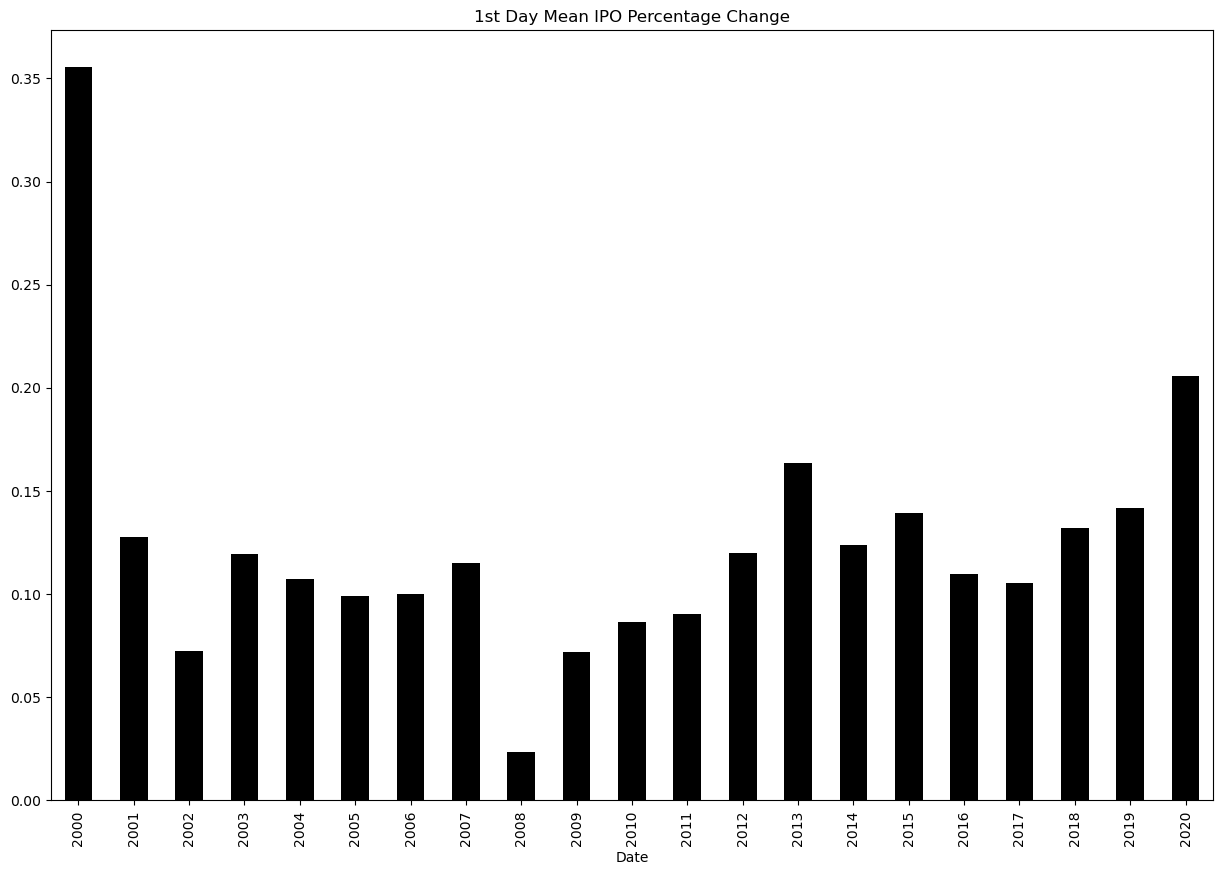

In [165]:
#从第一天的平均收益百分比开始
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].mean().plot(kind='bar',figsize=(15,10),color='k',title='1st Day Mean IPO Percentage Change')

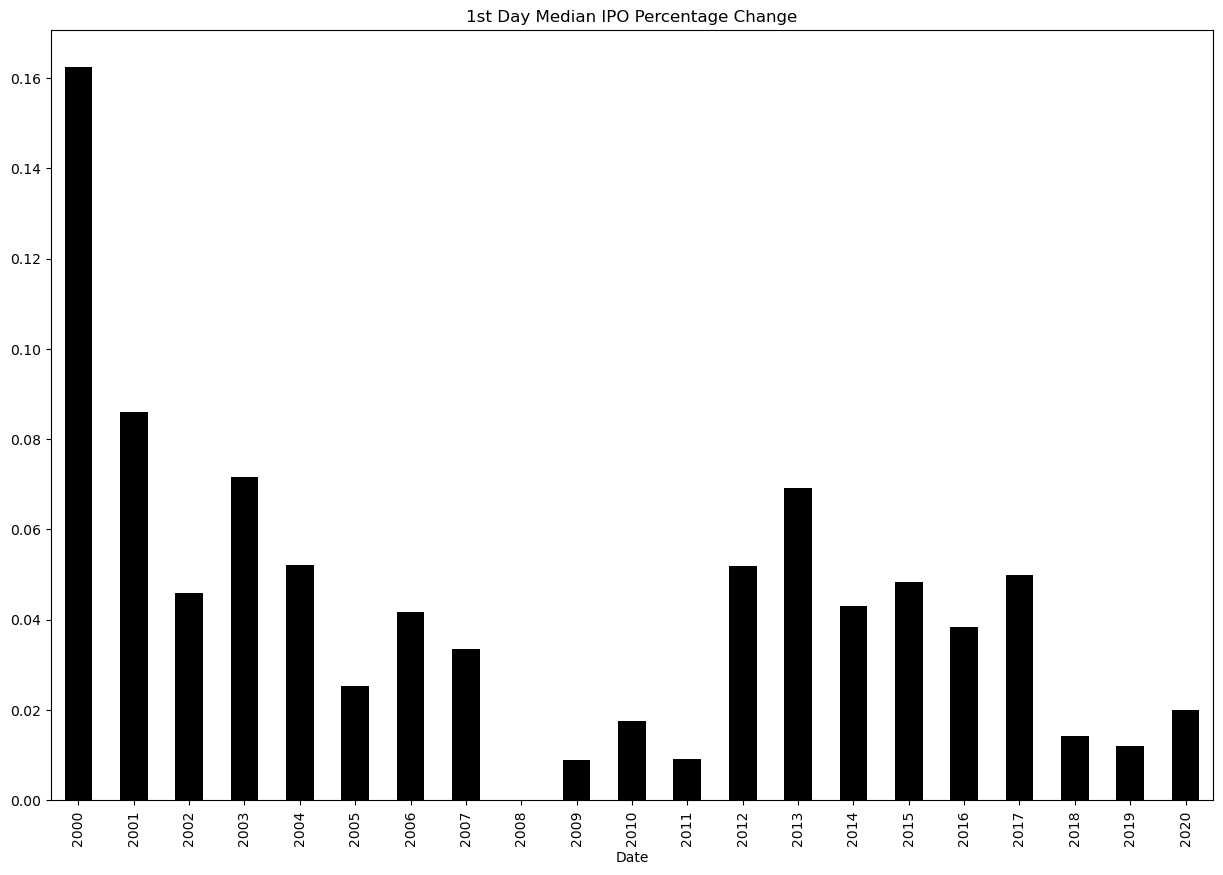

In [166]:
#中位数表现
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].median().plot(kind='bar',figsize=(15,10),color='k',title='1st Day Median IPO Percentage Change')

In [167]:
#观察数据整体
ipos['1st Day % Px Chng'].describe() 

count    3632.000000
mean        0.135870
std         0.285964
min        -0.410833
25%         0.000000
50%         0.038462
75%         0.195698
max         3.538519
Name: 1st Day % Px Chng, dtype: float64

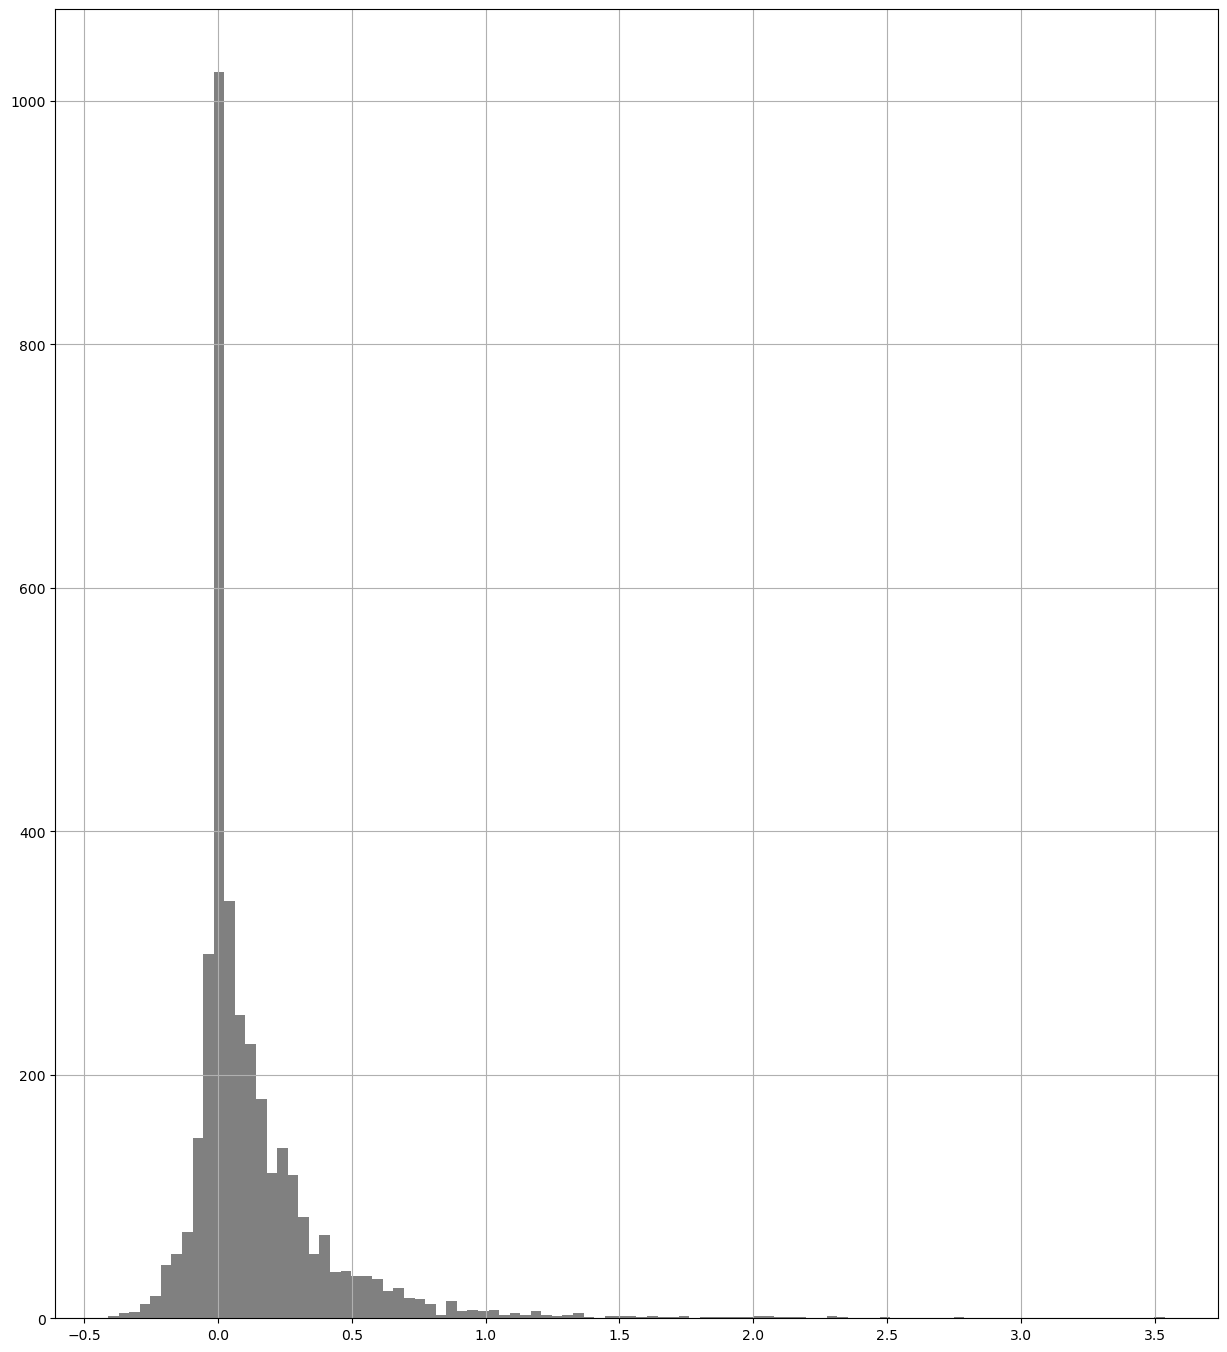

In [168]:
#绘制图表
ipos['1st Day % Px Chng'].hist(figsize=(15,17),bins=100,color='grey')

##### 分析开盘价的收益率

In [169]:
#修改不好的值
ipos.loc[2727,'$ Chg Opening']=.01
ipos.loc[2727,'Opening Price']=11.26
ipos.loc[3525,'$ Chg Opening']=.01
#创建两个新列
ipos['$ Chg Open to Close']=ipos['$ Chg Close']-ipos['$ Chg Opening']
ipos['% Chg Open to Close']=(ipos['$ Chg Open to Close']/ipos['Opening Price'])*100
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.089286,0.7500,-1.2500,2,NaN,-2.0000,-13.559322
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.057273,0.0300,0.6300,1,NaN,0.6000,5.439710
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0.000000,0.0000,0.0000,1,NaN,0.0000,0.000000
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.039231,0.8500,0.5100,1,NaN,-0.3400,-2.454874
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045000,0.5200,0.4500,1,NaN,-0.0700,-0.665399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3,NaN,1.3750,6.267806
3629,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225000,2.0625,4.5000,2,NaN,2.4375,11.048159
3630,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1,NaN,1.3750,11.458333
3631,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.039474,1.0625,0.3750,2,NaN,-0.6875,-6.508876


In [170]:
#生成详细统计信息
ipos['% Chg Open to Close'].describe()

count    3633.000000
mean        1.363903
std        11.670708
min       -49.281222
25%        -2.883156
50%         0.000000
75%         3.829787
max       217.365269
Name: % Chg Open to Close, dtype: float64

In [171]:
ipos.loc[ipos['% Chg Open to Close'].idxmin()]
ipos['% Chg Open to Close'].idxmin()

1963

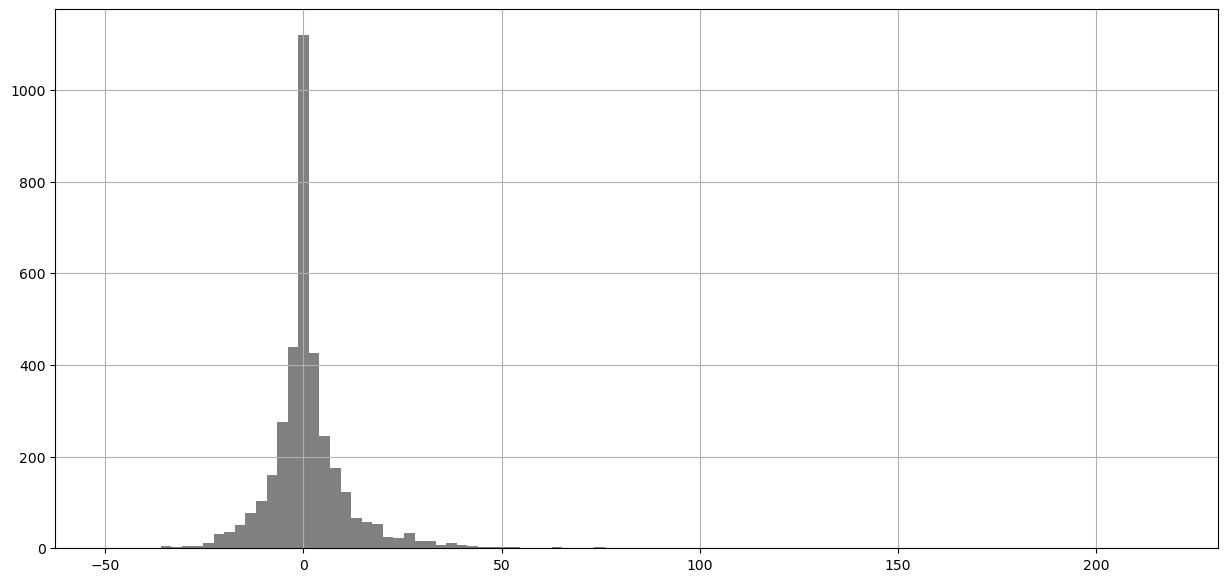

In [172]:
ipos['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='grey')

In [173]:
#查看2015年至今的数据
ipos[(ipos['Date'] >= '2015-01-01')]['$ Chg Open to Close'].describe()
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].sum()

226.176

In [174]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe() 

count    501.000000
mean       1.624503
std        2.858726
min        0.010000
25%        0.120000
50%        0.640000
75%        1.780000
max       20.590000
Name: $ Chg Open to Close, dtype: float64

In [175]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe() 

count    519.000000
mean      -1.132370
std        1.485732
min      -10.000000
25%       -1.530000
50%       -0.620000
75%       -0.120000
max       -0.010000
Name: $ Chg Open to Close, dtype: float64

In [176]:
sp = pd.read_csv(r'D:/GoCode/ML/ipos/main.ipynb/spy.csv') 
sp.sort_values('Date', inplace=True) 
sp.reset_index(drop=True, inplace=True) 
sp 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-05-12,1407.81,1430.13,1407.81,1420.96,1420.96,858200000
1,2000-05-15,1420.96,1452.39,1416.54,1452.36,1452.36,854600000
2,2000-05-16,1452.36,1470.40,1450.76,1466.04,1466.04,955500000
3,2000-05-17,1466.04,1466.04,1441.67,1447.80,1447.80,820500000
4,2000-05-18,1447.80,1458.04,1436.59,1437.21,1437.21,807900000
...,...,...,...,...,...,...,...
5111,2020-09-04,3453.60,3479.15,3349.63,3426.96,3426.96,4438720000
5112,2020-09-08,3371.88,3379.97,3329.27,3331.84,3331.84,4694330000
5113,2020-09-09,3369.82,3424.77,3366.84,3398.96,3398.96,3932520000
5114,2020-09-10,3412.56,3425.55,3329.25,3339.19,3339.19,4208630000


#### 增加特征值

In [177]:
#计算标普 500 昨日收盘价相对于其七天前收盘价的变化百分比
def get_week_chg(ipo_dt):
    try:
        day_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1 
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 8
        chg = (sp.iloc[day_ago_idx]['Close'] -sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg*100
    except:
        print('error', ipo_dt.date())

ipos.loc[2095, 'Date'] = pd.to_datetime('2009-08-12') 
ipos.loc[1596, 'Date'] = pd.to_datetime('2012-11-20') 
ipos.loc[968, 'Date'] = pd.to_datetime('2015-05-21') 
ipos.loc[967, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[219, 'Date'] = pd.to_datetime('2019-02-14') 

ipos['SP Week Change']=ipos['Date'].map(get_week_chg)


In [178]:
#标准普尔 500 指数在 IPO 前一天收盘时到 IPO 首日开盘时这个期间内，变化的百分比
def get_cto_chg(ipo_dt):
    try:
        today_open_idx=sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1 
        chg=(sp.iloc[today_open_idx]['Open']-sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg*100
    except:
        print('error', ipo_dt) 

ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg) 

In [179]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.089286,0.7500,-1.2500,2,NaN,-2.0000,-13.559322,2.459857,0.206524
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.057273,0.0300,0.6300,1,NaN,0.6000,5.439710,2.459857,0.206524
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0.000000,0.0000,0.0000,1,NaN,0.0000,0.000000,2.459857,0.206524
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.039231,0.8500,0.5100,1,NaN,-0.3400,-2.454874,2.459857,0.206524
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045000,0.5200,0.4500,1,NaN,-0.0700,-0.665399,1.137729,0.227332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3,NaN,1.3750,6.267806,0.558346,0.000000
3629,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225000,2.0625,4.5000,2,NaN,2.4375,11.048159,0.558346,0.000000
3630,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1,NaN,1.3750,11.458333,2.083566,0.000000
3631,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.039474,1.0625,0.3750,2,NaN,-0.6875,-6.508876,4.962166,0.000000


In [180]:
#整理承销商的数据
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Mangager'].map(lambda x: x.split('/')[0])
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

In [181]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

A.G. Edwards
A.G. Edwards & Sons
A.G. Edwrads & Sons
AG Edwards
AG Edwards & Sons
AG Edwrads
AMTD
AMTD Global Markets
Adams Harkness
Advest
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Alexander Capital
Anderson & Strudrick
Axiom
Axiom Capital Management
B. Riley FBR
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Banc of America
Banc of America Securities
Barclay Capital
Barclays
Barclays Capital
Bear Stearns
Bear Streans
Bear, Stearns
Benchmark
Benchmark Company
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lync
BofA Merrill Lynch
BofA Securities
Boustead Securities
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC Capital Markets
CIBC World Markets
CIBC Worldwide
CICC
CRT Capital
CRT Capital Group
CS First Boston
CSFB
CSFirst Boston
Canaccord Genuity
Cantor
Cantor Fitzgerald
Cantor Fitzger

In [182]:
#清理规范承销商的名字

ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.' 
ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards' 
ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AGEdwards' 
ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays' 
ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital' 
ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank' 
ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB' 
ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB' 
ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital' 
ipos.loc[325,'Lead Mgr'] = 'Maximum Captial' 
ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods' 
ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley' 
ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan' 
ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan' 
ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan' 
ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America' 
ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch' 
ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch' 
ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch' 
ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch' 
ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch' 
ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch' 
ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners' 
ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners' 
ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman &Renshaw' 
ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird' 
ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald' 
ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'
ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns' 
ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch' 
ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital' 
ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson' 
ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.' 
ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International' 
ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup' 
ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts' 
ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey' 
ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers' 
ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen' 
ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies' 
ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer' 
ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities' 
ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice' 
ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann' 
ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray' 
ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital' 
ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.' 
ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital' 
ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus' 
ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson' 
ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia' 
ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair' 
ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich' 
ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group' 
ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC' 
ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital' 
ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner' 
ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr'] = 'Cohen & Co.' 
ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.' 
ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr'] = 'Leerink Partners' 
ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [183]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), 
columns=['Name']).sort_values('Name')['Name']: 
    print(n) 


AG Edwards
AGEdwards
AMTD
AMTD Global Markets
Adams Harkness
Advest
Aegis Capital
Alexander Capital
Anderson & Strudrick
Axiom
Axiom Capital Management
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Banc of America
Barclays
Bear Stearns
Benchmark
Benchmark Company
BofA Merrill Lync
BofA Merrill Lynch
BofA Securities
Boustead Securities
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC
CICC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan
Chardan Capital Markets
Chase H&Q
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital
Craig-Hallum Capital Group
Credit Suiss
DA Davidson
DBAB
DLJ
DPO (Direct Public Offering)
Dain Rauscher Wessels
Dawson James Securities
Deutsche Bank
Donald
Donaldson Lufkin & Jenrette
Donaldson, Lufkin & Jenrette
Dougherty & Company
EarlyBirdCapital
Equity Securities
Evercore ISI
FIG Partners
FTN Midwest Securities
Feltl & Co.
Ferr

In [184]:
#增加承销商数量
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Mangager'].map(lambda x: len(x.split('/'))) 


In [185]:
#增加日期相关特征
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'}) 
ipos['Month'] = ipos['Date'].map(lambda x: x.month) 
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}) 

ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Mangager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.089286,0.7500,-1.2500,2,NaN,-2.0000,-13.559322,2.459857,0.206524,Jefferies,2,Fri,Jan
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.057273,0.0300,0.6300,1,NaN,0.6000,5.439710,2.459857,0.206524,CSFB,2,Fri,Jan
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0.000000,0.0000,0.0000,1,NaN,0.0000,0.000000,2.459857,0.206524,Citigroup,3,Fri,Jan
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.039231,0.8500,0.5100,1,NaN,-0.3400,-2.454874,2.459857,0.206524,Wells Fargo Securities,3,Fri,Jan
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045000,0.5200,0.4500,1,NaN,-0.0700,-0.665399,1.137729,0.227332,Deutsche Bank,1,Fri,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3,NaN,1.3750,6.267806,0.558346,0.000000,Merrill Lynch,1,Fri,Dec
3629,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225000,2.0625,4.5000,2,NaN,2.4375,11.048159,0.558346,0.000000,Goldman Sachs,2,Fri,Dec
3630,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1,NaN,1.3750,11.458333,2.083566,0.000000,CSFB,1,Mon,Dec
3631,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.039474,1.0625,0.3750,2,NaN,-0.6875,-6.508876,4.962166,0.000000,JP Morgan,1,Tues,Dec


In [186]:
#发行价和开盘价之间的变化，以及发行价和收盘价之间的变化
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100 
ipos['Open to Close Pct'] = (ipos['$ Chg Close'].astype('float') -ipos['$ Chg Opening'].astype('float'))/ipos['Opening Price'].astype('float') * 100 

#### 训练模型

In [187]:
#原始的形式获取数据，并将其转换为适用于统计模型构建的矩阵
from patsy import dmatrix 
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") +Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") + Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos, 
return_type='dataframe') 
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,5.084746,0.7500,14.00,14.7500,0.206524,2.459857
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.271985,0.0300,11.00,11.0300,0.206524,2.459857
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.000000,0.0000,13.50,13.5000,0.206524,2.459857
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,6.137184,0.8500,13.00,13.8500,0.206524,2.459857
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.942966,0.5200,10.00,10.5200,0.227332,1.137729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,27.065527,5.9375,16.00,21.9375,0.000000,0.558346
3629,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.348442,2.0625,20.00,22.0625,0.000000,0.558346
3630,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.916667,1.3100,10.69,12.0000,0.000000,2.083566
3631,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.059172,1.0625,9.50,10.5625,0.000000,4.962166


In [269]:
#切割数据，主观地为正向结果设置了 1 美元的阈值
idx=205
X_train, X_test = X[idx:], X[:idx] 
y_train = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= 1 else 0) 
y_test = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= 1 else 0)

In [282]:
#拟合该模型
clf = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
clf.fit(X_train, y_train) 

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [283]:
clf.score(X_test, y_test) 

0.8341463414634146

In [284]:
#默认全买的情况
ipos[(ipos['Date']>='2018-01-01')]['$ Chg Open to Close'].describe()

count    653.000000
mean       0.224496
std        2.844097
min      -10.000000
25%       -0.500000
50%        0.000000
75%        0.360000
max       20.590000
Name: $ Chg Open to Close, dtype: float64

In [285]:
pred_label=clf.predict(X_test)

In [286]:
#使用模型进行预测后购买
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.loc[y_test.index]['$ Chg Open to Close']): 
    if pl==tl:
        results.append([idx,chg,pl,tl,1])
    else:
        results.append([idx,chg,pl,tl,0])

rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct']) 
rf

,index,$ chg,predicted,actual,correct
0,0,-2.000,0,0,1
1,1,0.600,0,0,1
2,2,0.000,0,0,1
3,3,-0.340,0,0,1
4,4,-0.070,0,0,1
...,...,...,...,...,...
200,200,0.000,0,0,1
201,201,-0.240,0,0,1
202,202,0.353,0,0,1
203,203,0.160,0,0,1


In [287]:
#发现购买次数从205下降到15，平均回报涨到2.24，但是中位数下降严重
rf[rf['predicted']==1]['$ chg'].describe() 


count    15.000000
mean      2.247333
std       7.572700
min      -6.760000
25%      -2.250000
50%      -1.000000
75%       4.885000
max      19.350000
Name: $ chg, dtype: float64

Text(0.5, 0, 'Index')

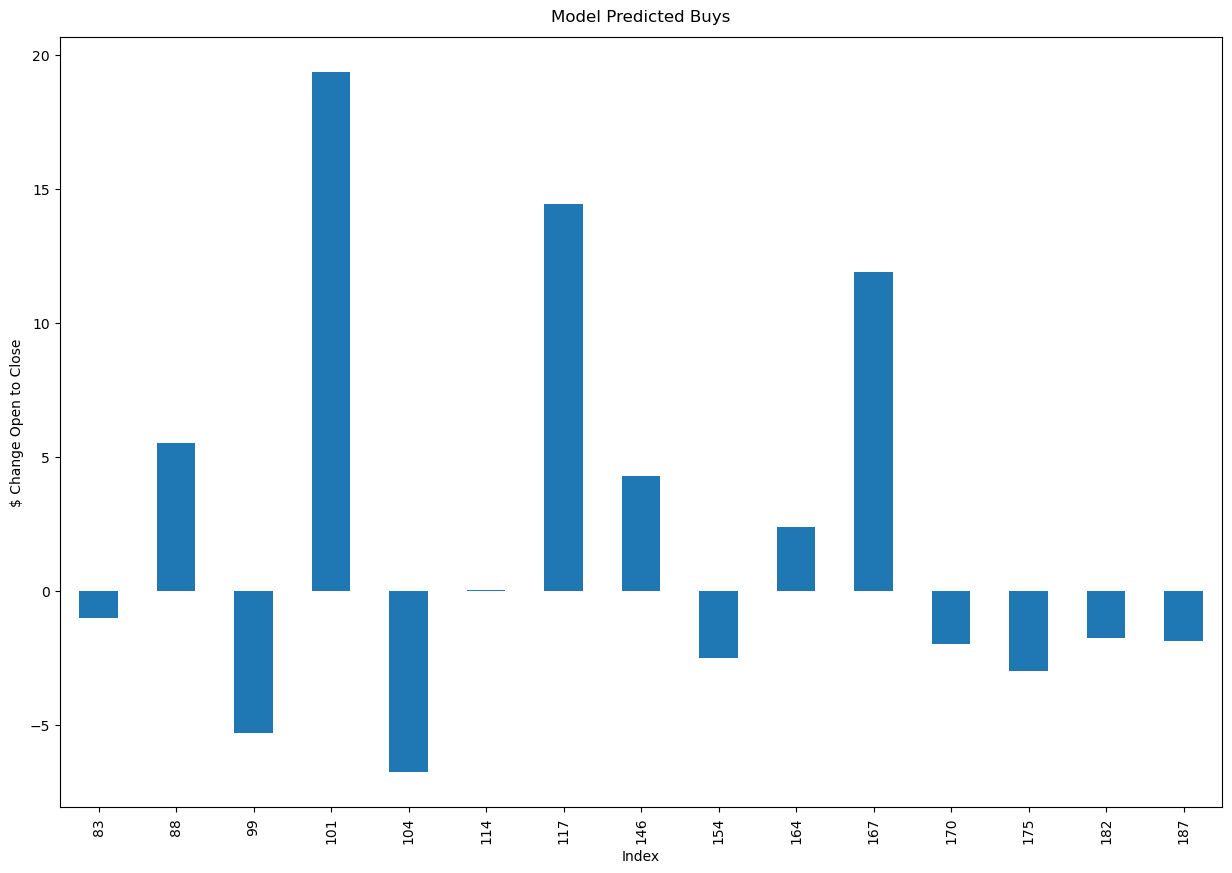

In [276]:
#绘制预测的回报图表
fig,ax=plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01) 
ax.set_ylabel('$ Change Open to Close') 
ax.set_xlabel('Index') 

In [289]:
#设置0.25的阈值
idx=205
X_train, X_test = X[idx:], X[:idx] 
y_train = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= 0.25 else 0) 
y_test = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= 0.25 else 0)
clf = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
clf.fit(X_train, y_train) 
clf.score(X_test, y_test) 

0.7463414634146341

In [290]:
pred_label = clf.predict(X_test) 
results=[] 
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.loc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
         results.append([idx, chg, pl, tl, 0])

rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct']) 
rf[rf['predicted']==1]['$ chg'].describe() 

count    34.000000
mean      0.353824
std       6.259121
min      -8.900000
25%      -2.870000
50%      -0.115000
75%       2.387500
max      19.350000
Name: $ chg, dtype: float64

In [292]:
#减少训练集的数据
idx=562
X_train, X_test = X[idx:], X[:idx] 
y_train = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= 0.25 else 0) 
y_test = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= 0.25 else 0)
clf = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
clf.fit(X_train, y_train) 
clf.score(X_test, y_test) 

0.7064056939501779

In [293]:
pred_label = clf.predict(X_test) 
results=[] 
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.loc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
         results.append([idx, chg, pl, tl, 0])

rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct']) 
rf[rf['predicted']==1]['$ chg'].describe() 

count    101.000000
mean       0.360396
std        5.078534
min      -10.000000
25%       -2.490000
50%        0.120000
75%        1.830000
max       19.750000
Name: $ chg, dtype: float64

In [297]:
#可能是包版本的问题，我用书中提供的也是运行失败，实在不会解决
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

AttributeError: 'Series' object has no attribute 'columns'

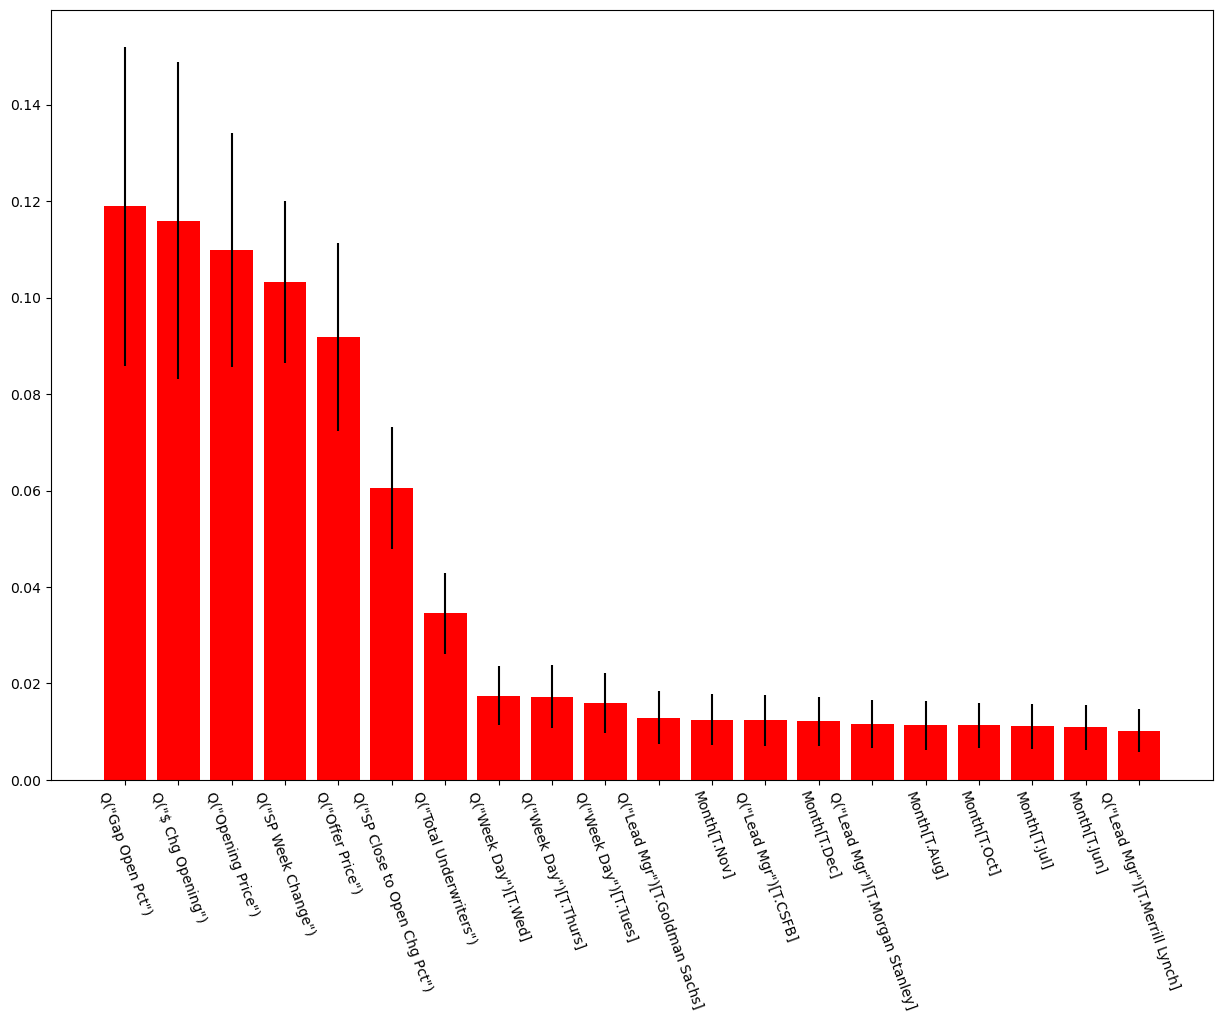

In [240]:
clf_rf = RandomForestClassifier(n_estimators=1000) 
clf_rf.fit(X_train, y_train) 
f_importances = clf_rf.feature_importances_ 
f_names = X_train 
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], 
axis=0) 
zz = zip(f_importances, f_names, f_std) 
zzs = sorted(zz, key=lambda x: x[0], reverse=True) 
imps = [x[0] for x in zzs[:20]] 
labels = [x[1] for x in zzs[:20]] 
errs = [x[2] for x in zzs[:20]] 
plt.subplots(figsize=(15,10)) 
plt.bar(range(20), imps, color="r", yerr=errs, align="center") 
plt.xticks(range(20), labels, rotation=-70);